In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve,roc_auc_score,classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.utils import resample


In [2]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# UnBalanced Data

<Axes: xlabel='Outcome', ylabel='count'>

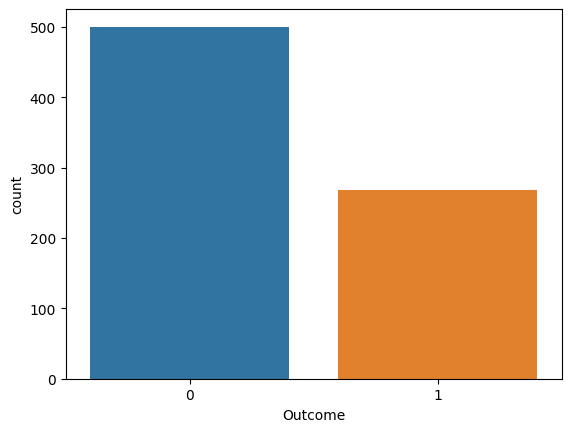

In [5]:
sns.countplot(x ='Outcome', data = df)

In [6]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41,stratify=y)

In [7]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
y_pred_train = rf_model.predict(x_train)

cnf_metrix = confusion_matrix(y_train,y_pred_train) 
print("Confusion Matrix :\n",cnf_metrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy score : ",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report ; ",clf_report)



Confusion Matrix :
 [[400   0]
 [  0 214]]
Accuracy score :  1.0
Classification Report ;                precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [9]:
y_pred = rf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[83 17]
 [22 32]]
Accuracy: 0.7467532467532467
Clssification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



# After Data Balanced

In [10]:
df_majority = df[(df['Outcome']==0)] 
df_minority = df[(df['Outcome']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 500, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [11]:
len(df_upsampled.index)

1000

In [12]:
df_upsampled["Outcome"].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

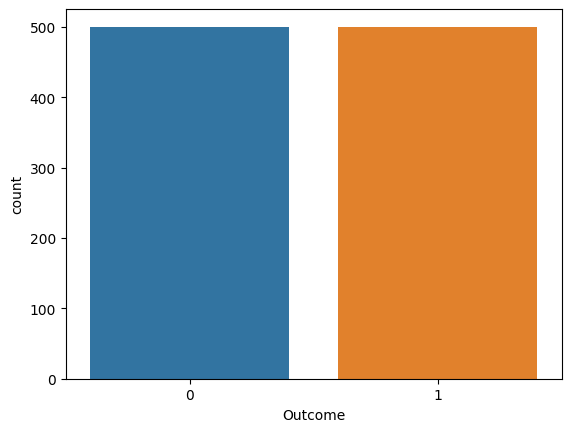

In [13]:
sns.countplot(x="Outcome",data=df_upsampled)

In [32]:
df.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0


In [42]:
x=df_upsampled[["Glucose","BMI","Age","DiabetesPedigreeFunction"]]
y=df_upsampled["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25,stratify=y)

In [43]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
y_pred_train = rf_model.predict(x_train)

cnf_metrix = confusion_matrix(y_train,y_pred_train) 
print("Confusion Matrix :\n",cnf_metrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy score : ",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report ; ",clf_report)

Confusion Matrix :
 [[400   0]
 [  0 400]]
Accuracy score :  1.0
Classification Report ;                precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [45]:
y_pred = rf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[79 21]
 [ 9 91]]
Accuracy: 0.85
Clssification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       100
           1       0.81      0.91      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



# Fandom Forest Hyperparameter Tuning

In [ ]:
rf_model = RandomForestClassifier()

hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'max_features':['sqrt'],
                   'random_state':[11]
                   }

gscv_rf_model = GridSearchCV(rf_model,hyperparameters,cv = 5)
gscv_rf_model.fit(x_train,y_train)

In [46]:
rf_model = RandomForestClassifier()

hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'max_features':['sqrt'],
                   'random_state':[11],
                   "oob_score":[True]
                   }

rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv = 5)
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'oob_score': [True],
                                        'random_state': [11]})

In [47]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=49, oob_score=True, random_state=11)

In [48]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=49, oob_score=True, random_state=11)

In [49]:
y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[334  66]
 [ 24 376]]
Accuracy: 0.8875
Clssification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       400
           1       0.85      0.94      0.89       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



In [50]:
y_pred = rf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[76 24]
 [15 85]]
Accuracy: 0.805
Clssification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       100
           1       0.78      0.85      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



In [51]:
rf_model.feature_importances_

array([0.40639086, 0.24073126, 0.23910068, 0.1137772 ])

<Axes: >

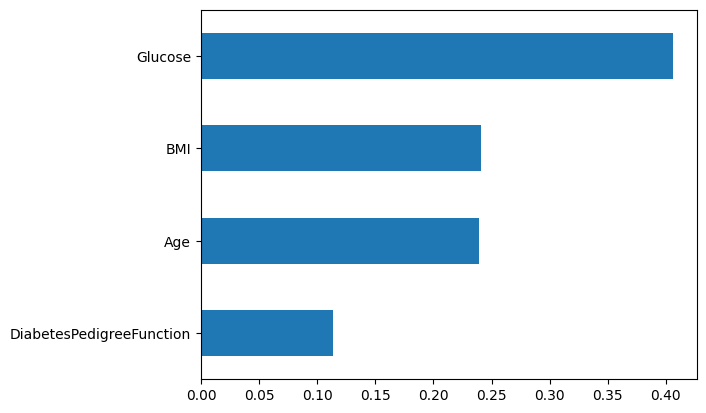

In [52]:
s1 = pd.Series(rf_model.feature_importances_,index = x.columns)
s1.sort_values().plot(kind = "barh")

In [53]:
rf_model.oob_score

True

In [54]:
rf_model.oob_score_

0.81625

# Decision Tree

In [55]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred_train = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[400   0]
 [  0 400]]
Accuracy: 1.0
Clssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [57]:
y_pred = dt_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[81 19]
 [13 87]]
Accuracy: 0.84
Clssification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       100
           1       0.82      0.87      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [58]:
import pickle
pickle.dump(rf_model, open('Diabetes_Model.pkl', 'wb'))